In [20]:
import matplotlib.pyplot as plt
from spider import SPIDER
op = SPIDER()
import anndata
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np


In [21]:
import importlib
importlib.metadata.version('spider-st')

'0.1.17'

In [22]:
ds = 'mouse_embryo'
sample_name = 'embryo1_2'
out_f = f'../example_datasets/{ds}/{sample_name}/'
adata = anndata.read_h5ad(f'{out_f}/adata.h5ad')

In [ ]:
no_spatalk = False
if len(adata) > 10000:
    no_spatalk=True
idata = op.prep(adata, out_f, R_path, cluster_key=adata.uns['cluster_key'], is_human=adata.uns['is_human'], coord_type=adata.uns['coord_type'], no_spatalk=no_spatalk)
idata, meta_idata = op.find_svi(idata, out_f, R_path, alpha=0.3)
idata.write_h5ad(f'{out_f}/idata.h5ad')

In [23]:
idata = anndata.read_h5ad(f'{out_f}/idata.h5ad')

metrics

Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC' 'moranI']
47/47 SVIs identified (threshold=0.01).
evaluating with ['moranI' 'gearyC' 'SOMDE' 'nnSVG']


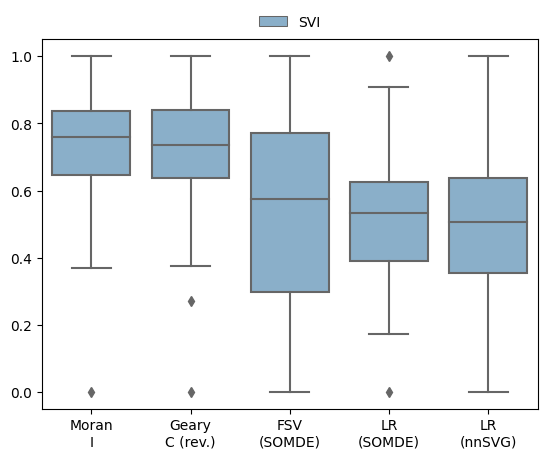

In [24]:
svi_df, svi_df_strict = op.svi.combine_SVI(idata,threshold=0.01)
op.svi.eva_SVI(idata, svi_df_strict)
plt.savefig(f'../figures/{ds}_{sample_name}_metric.png', dpi=300,bbox_inches='tight')

100%|██████████| 1000/1000 [00:13<00:00, 71.56/s]


Mouse KEGG_2019_Mouse
Using mouse LR pair dataset.
50
0.5179533452419275 0.34361495559329286 0.2813093088682017


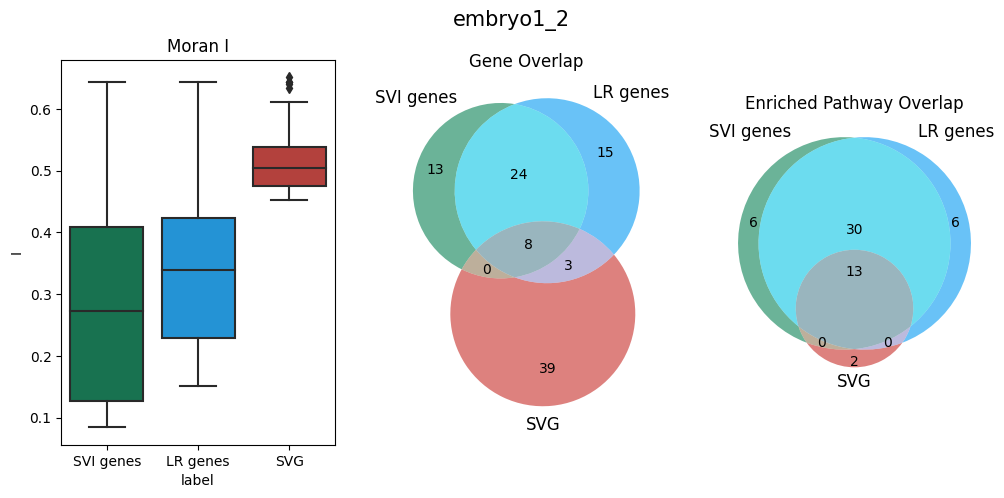

In [25]:
op.util.adata_moranI(adata, out_f=out_f)
merged_df,lri_pw_list,gene_lr_list,gene_pw_list = op.vis.svg_svi_relation(adata, idata, title=sample_name, is_human=adata.uns['is_human'], top=50)
plt.savefig(f'../figures/{ds}_{sample_name}_relation.png', dpi=600,bbox_inches='tight')

In [26]:
import gseapy
membership=pd.get_dummies(merged_df.set_index('Term')['group']).groupby('Term').sum().astype(str).agg('-'.join, axis=1).reset_index()
for x in membership[0].unique():
    sub_df = merged_df[merged_df.Term.isin(membership[membership[0]==x].Term)]
    if len(sub_df.Term.unique())>20:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=20, figsize=(3,8),top_term=30,show_ring=True, ofname=f'../figures/{ds}_{sample_name}_svgi_pw_{x}.png')
    elif len(sub_df.Term.unique())>10:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=20, figsize=(3,6),top_term=30,show_ring=True, ofname=f'../figures/{ds}_{sample_name}_svgi_pw_{x}.png')
    elif len(sub_df.Term.unique())<5:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=30, figsize=(3,8),top_term=30,show_ring=True, ofname=f'../figures/{ds}_{sample_name}_svgi_pw_{x}_large.png')
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=100, figsize=(3,1),top_term=30,show_ring=True, ofname=f'../figures/{ds}_{sample_name}_svgi_pw_{x}_small.png')
    else:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=10, figsize=(3,8),top_term=30,show_ring=True, ofname=f'../figures/{ds}_{sample_name}_svgi_pw_{x}_large.png')
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=50, figsize=(3,2),top_term=30,show_ring=True, ofname=f'../figures/{ds}_{sample_name}_svgi_pw_{x}_small.png')

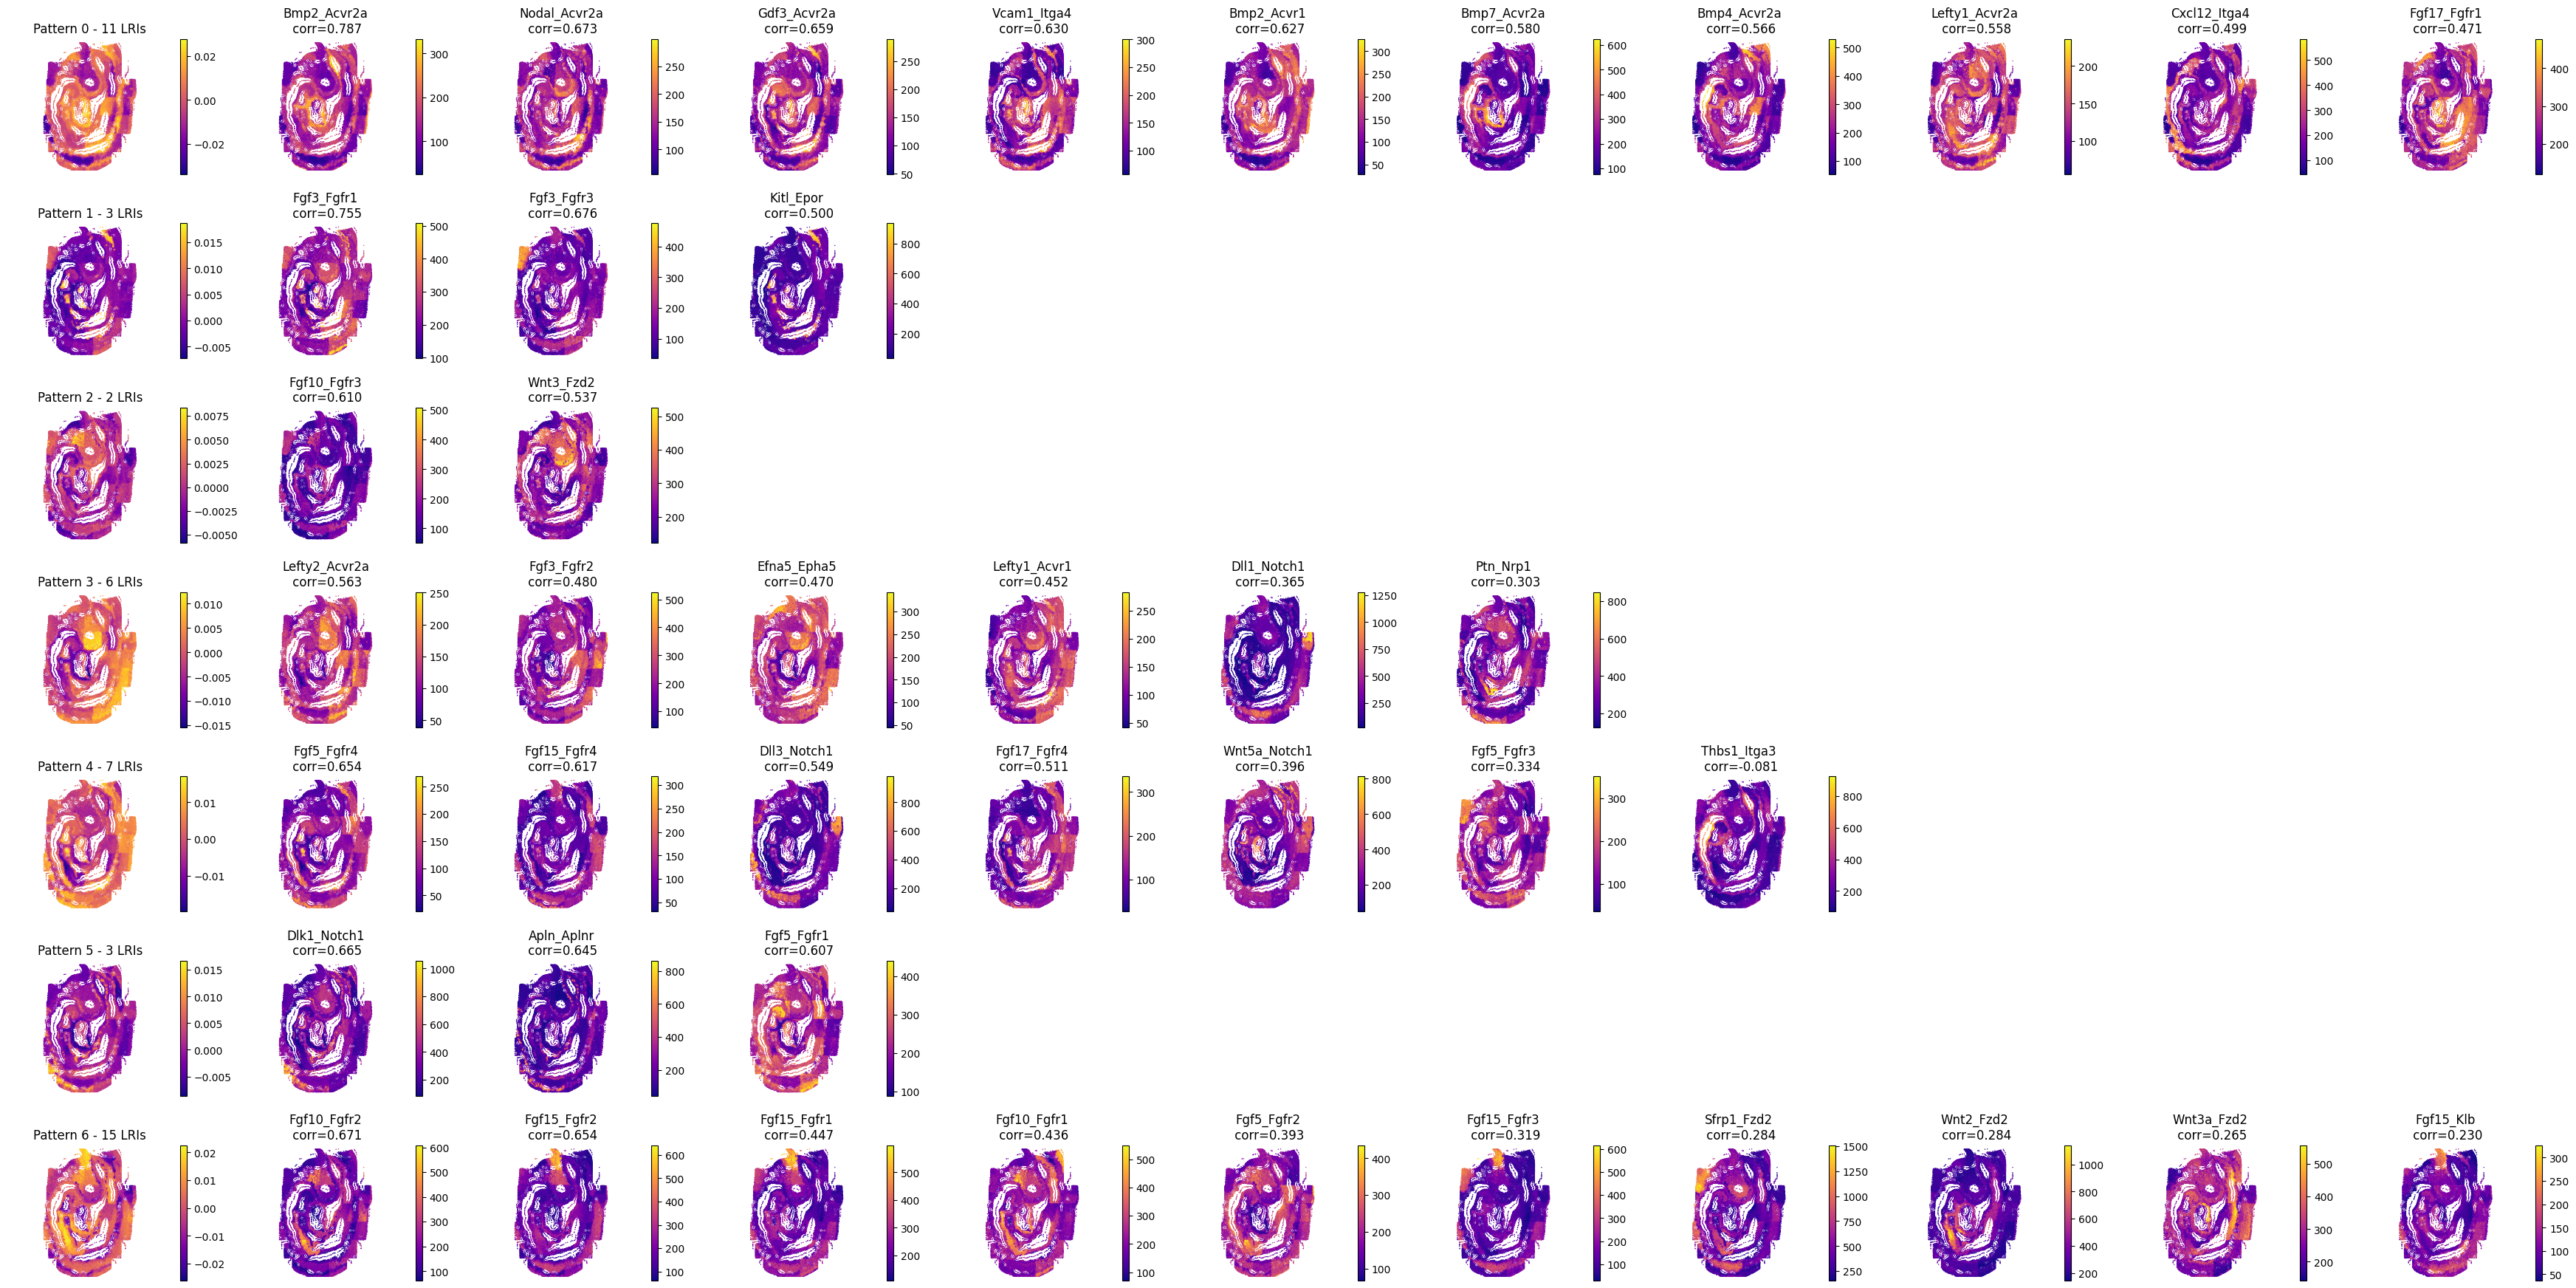

In [27]:
op.vis.pattern_LRI(idata,show_SVI=10, spot_size=1)
plt.tight_layout()
plt.savefig(f'../figures/{ds}_{sample_name}_patterns.png', dpi=600,bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_no vs. 1_yes: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.233e-04 U_stat=0.000e+00
0_no vs. 0_yes: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.107e-06 U_stat=1.600e+01
2_no vs. 2_yes: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.850e-03 U_stat=0.000e+00
3_no vs. 3_yes: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.450e-07 U_stat=2.000e+00
4_no vs. 4_yes: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.593e-04 U_stat=2.500e+01
5_no vs. 5_yes: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.233e-04 U_stat=0.000e+00
6_no vs. 6_yes: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction

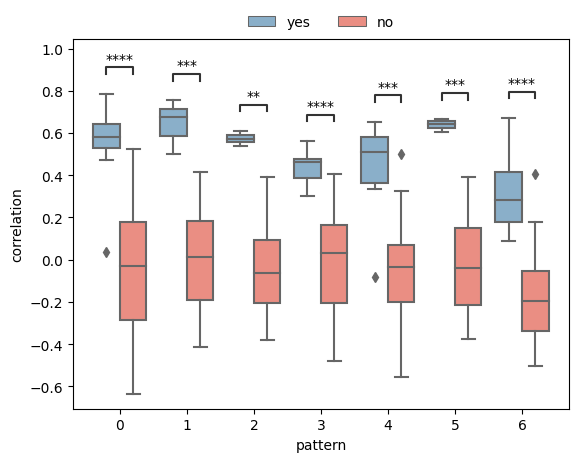

In [28]:
op.svi.eva_pattern(idata)
plt.savefig(f'../figures/{ds}_{sample_name}_pattern_metric.png', dpi=600,bbox_inches='tight')


In [29]:
idata = idata[:, idata.var['is_svi']==1]

In [30]:
adata, adata_lri, adata_pattern = op.cell_transform(idata, adata, label=adata.uns['cluster_key'])

Added key cell_pattern in idata.uns
Added key cell_score in idata.uns
Added key interaction_pattern, interaction_score in adata.obsm
Added key rank_interaction_score_groups, rank_interaction_pattern_groups in adata.uns


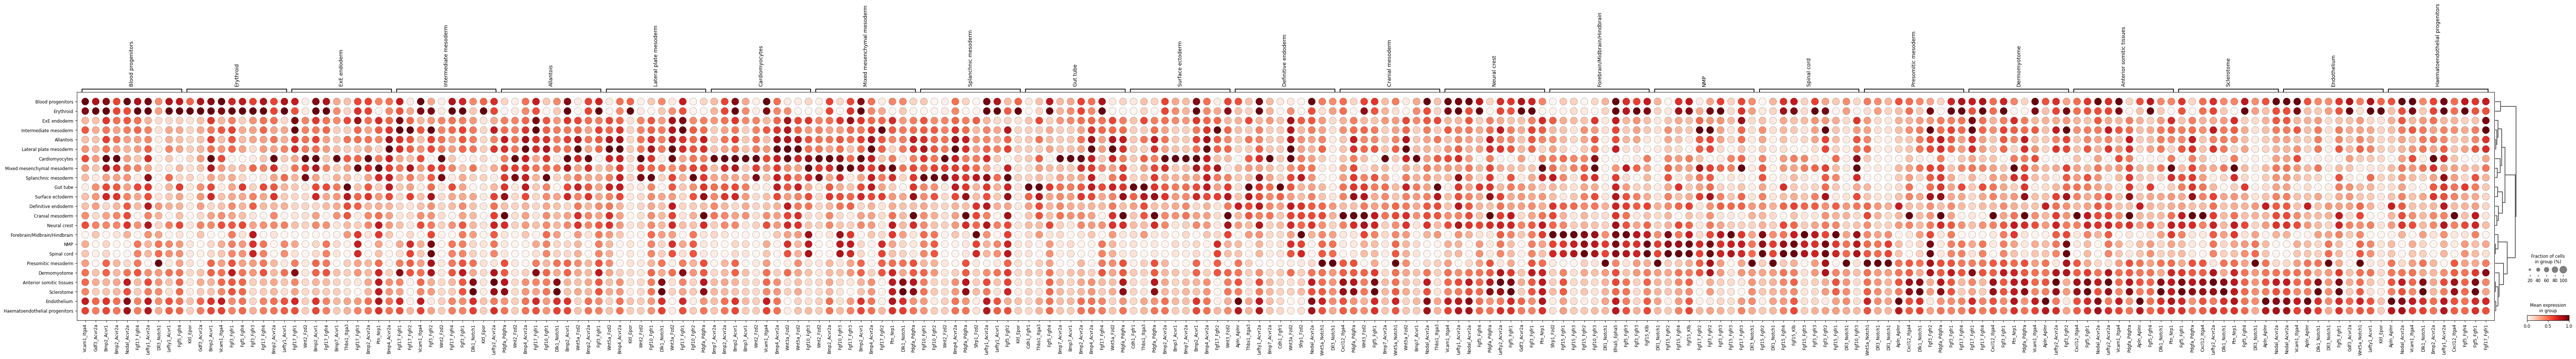

In [31]:
with plt.rc_context():
    sc.pl.rank_genes_groups_dotplot(adata_lri, standard_scale='var', show=False)
    plt.savefig(f'../figures/{ds}_{sample_name}_label_SVI.png', bbox_inches="tight")

In [ ]:
with plt.rc_context():
    sc.pl.rank_genes_groups_dotplot(adata_lri, standard_scale='var', n_genes=1, show=False)
    plt.savefig(f'../figures/{ds}_{sample_name}_label_SVI.png', bbox_inches="tight")

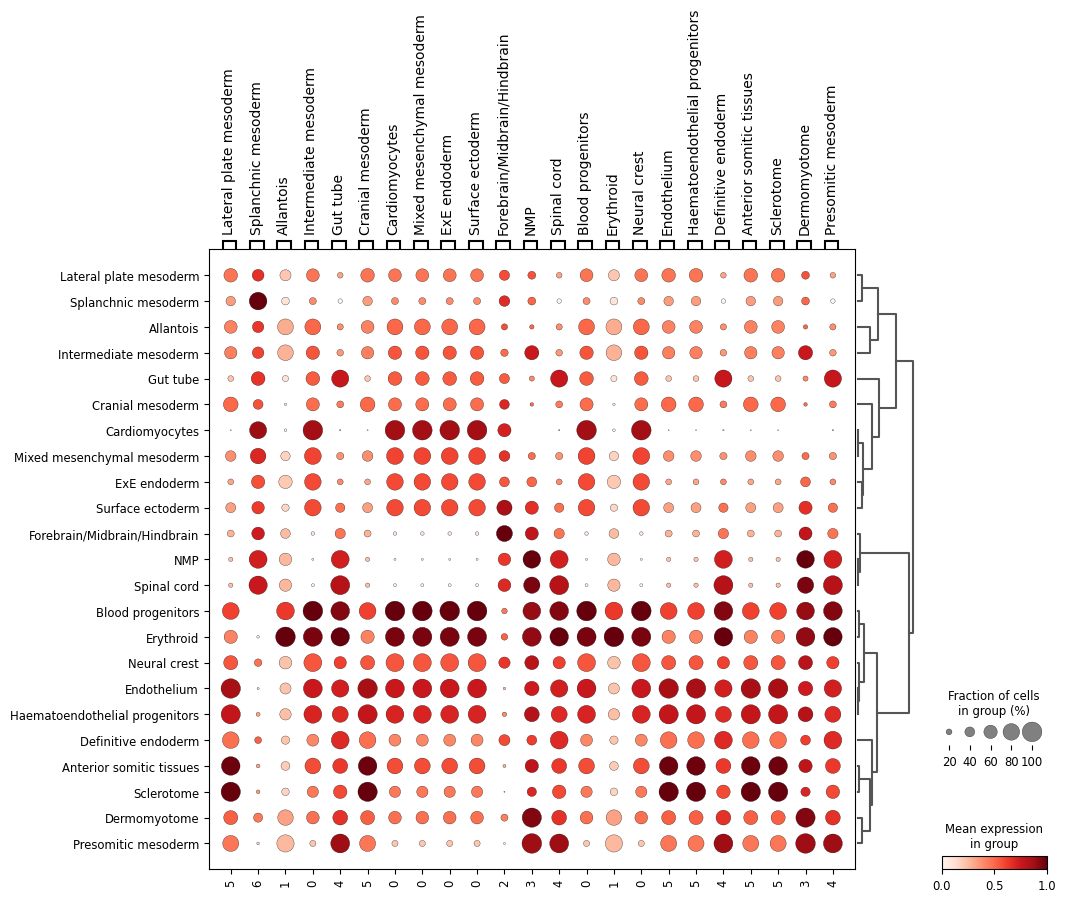

In [32]:
with plt.rc_context(): 
    sc.pl.rank_genes_groups_dotplot(adata_pattern, standard_scale='var', n_genes=1, show=False)
    plt.savefig(f'../figures/{ds}_{sample_name}_label_pattern.png', bbox_inches="tight")


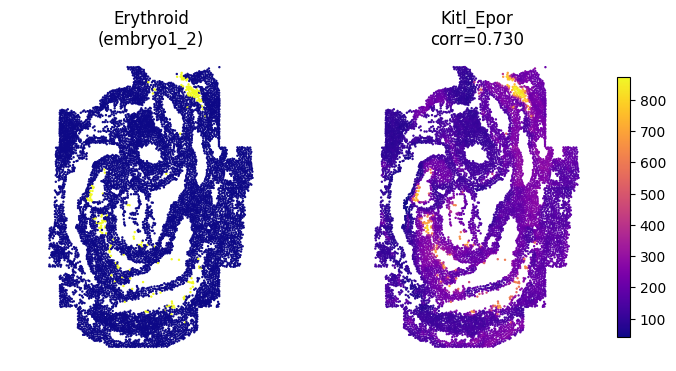

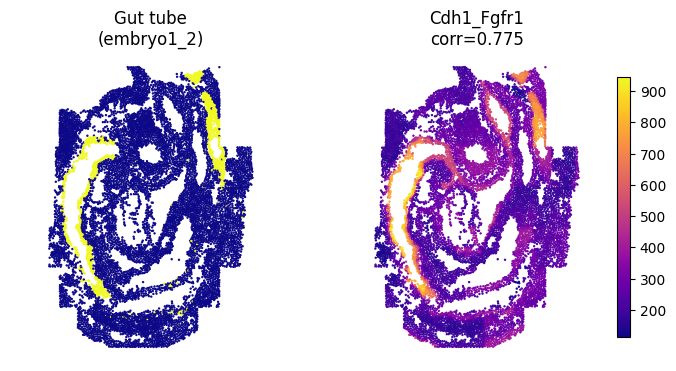

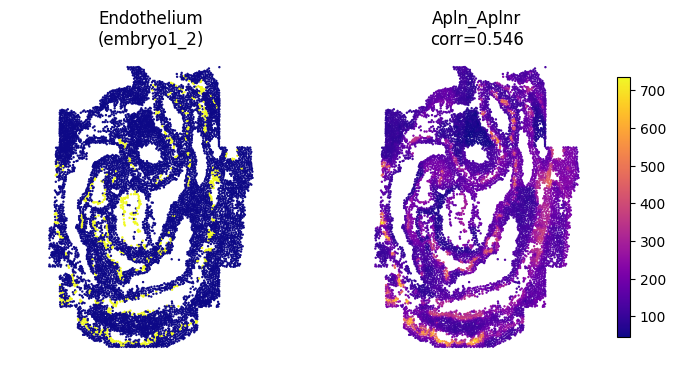

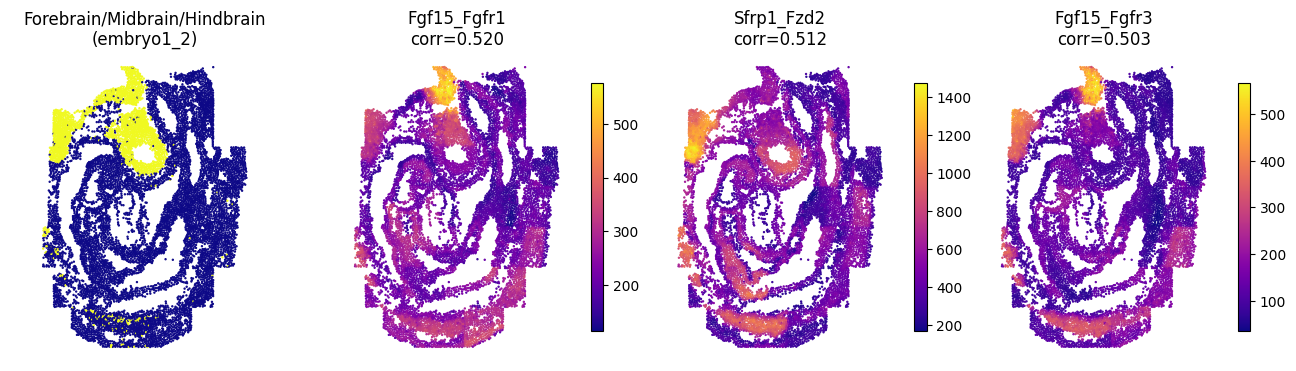

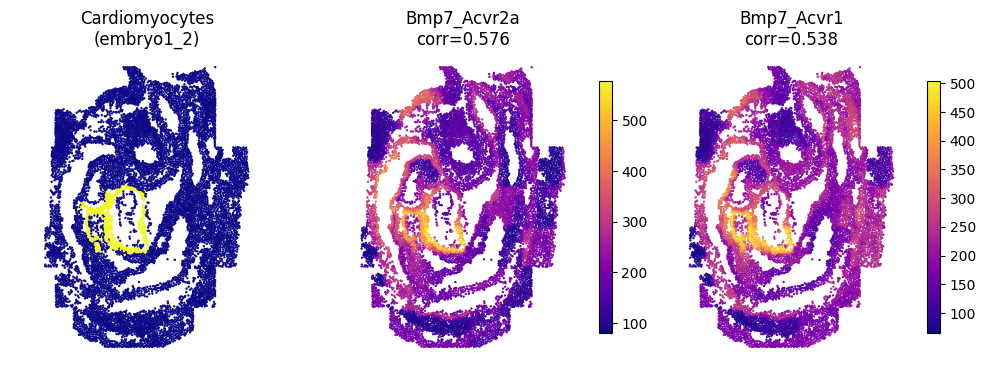

In [34]:
from scipy import stats
pds = []
for i in adata_lri.var_names:
    pds.append(pd.get_dummies(adata.obs[adata.uns['cluster_key']]).corrwith(adata_lri.to_df()[i].astype('float'), method=stats.pointbiserialr)[:1])
pds_df = pd.concat(pds)
pds_df.index = adata_lri.var_names
useful_df = []

df_plot = pd.concat([idata.uns['cell_meta'][['x_global_affine', 'y_global_affine']], pd.get_dummies(idata.uns['cell_meta']['celltype_mapped_refined'])], axis=1)
for i in adata.obs['celltype_mapped_refined'].unique():
    df_sub = pds_df[pds_df[i]>0.5][i].sort_values(ascending=False)
    if len(df_sub) > 0:
        useful_df.append(df_sub)
        markers = df_sub.index.to_numpy()
        corrs = df_sub.values
        cluster_name = df_sub.name
        plt.figure(figsize=(4*(len(markers)+1), 4))
        base = 1
        plt.subplot(1, len(markers)+1, base)

        plt.scatter(df_plot['x_global_affine'],df_plot['y_global_affine'], c=df_plot[cluster_name], s=0.5, cmap='plasma')
        plt.axis('equal')
        plt.axis('off')
        plt.title(f'{cluster_name}\n({sample_name})')
        base += 1

        marker_score = adata_lri.to_df()[markers]
        marker_score = pd.concat([adata.obs[['x_global_affine', 'y_global_affine']], marker_score], axis=1)
        for i in range(len(markers)):
            plt.subplot(1, len(markers)+1, base)
            im=plt.scatter(marker_score['x_global_affine'],marker_score['y_global_affine'], c=marker_score[markers[i]], s=0.5, cmap='plasma')
            plt.colorbar(im,fraction=0.046, pad=0.04)
            plt.axis('equal')
            plt.axis('off')
            plt.title(f'{markers[i]}\ncorr={"%.3f" % corrs[i]}')
            base += 1
        plt.savefig(f'../figures/{ds}_{sample_name}_{cluster_name.replace("/", "-")}.png', bbox_inches="tight", dpi=300)
        # plt.close()